# Modules

In [2]:
# Get Kagome Real Space Structure from Python Code (PyCall)
using PyCall,QuantumOptics,LinearAlgebra,SparseArrays,Plots

# Single Particle PBC Kagome Hamiltonian

In [3]:
py"""

import matplotlib.pyplot as plt
import numpy as np
sqrt = np.sqrt
a1_vec = np.array([2,0]);a2_vec = np.array([1,sqrt(3)])

###################################
# Change the parameters in here:
l1 = 2; l2 = 2; L = l1*l2; N = 3*L 
###################################

b1=np.array([0,0]);b2=a1_vec/2;b3=a2_vec/2
Basis = [b1,b2,b3]
basis_colors=['red','blue','green']
coordinates = [];sites = [];atom_dict={}
for i1 in range(l1):
    for i2 in range(l2):
        Lp = a1_vec * i1 + a2_vec * i2
        center = a1_vec * i1 + a2_vec * i2 + b1
        shift = (-b2-b3)/sqrt(3)/2
        P1=np.array([center+shift,center+a1_vec+shift,center+a2_vec+shift])
        for ib, b in enumerate(Basis):
            atom_vec = Lp + b
            atom_no = 3 * i1 * l2 + 3 * i2 + ib
            site = [i1,i2,ib]
            sites.append(site)
            coordinates.append(atom_vec)
            atom_dict[tuple(site)]=atom_vec
NN = [[(0,0,1), (0,0,2), (-1,0,1),(0,-1,2),   (-1,0,2), (-1,1,1), (0,-1,1),(1,-1,2)], 
      [(0,0,-1),(0,0,1), (1,0,-1),(1,-1,1),   (0,-1,1), (1,-1,-1),(0,1,-1),(1,0,1)], 
      [(0,0,-1),(0,0,-2),(0,1,-2),(-1,1,-1),  (-1,1,-2),(-1,0,-1),(0,1,-1),(1,0,-2)]
      ]
# t1=L1=-1;t2=L2=0
# t1=L1=0;t2=L2=-1
t1 = -1;L1 = 0.28;t2 = -0.3;L2 = 0.2
# t1=t2=-1;L1=L2=0
hopps = [[t1+1j*L1,t1-1j*L1,t1+1j*L1,t1-1j*L1,  t2+1j*L2,t2-1j*L2,t2-1j*L2,t2+1j*L2], 
         [t1-1j*L1,t1+1j*L1,t1-1j*L1,t1+1j*L1,  t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2], 
         [t1-1j*L1,t1+1j*L1,t1+1j*L1,t1-1j*L1,  t2-1j*L2,t2+1j*L2,t2+1j*L2,t2-1j*L2]] 
H = np.zeros([N,N],dtype=complex)
for atom_no in range(N):
    atom_site=sites[atom_no]
    for i_delta, delta in enumerate(NN[atom_site[2]]):
        neighbor_site = np.array(atom_site)+np.array(delta)
        neighbor_site[0] = neighbor_site[0]%l1
        neighbor_site[1] = neighbor_site[1]%l2    
        neighbor_no=3*neighbor_site[0]*l2+3*neighbor_site[1]+neighbor_site[2]
        H[neighbor_no,atom_no]=hopps[atom_site[2]][i_delta] 
        
"""

In [4]:
# Check some parameters
Nx = py"l1";Ny = py"l2";N = py"N";t1 = py"t1";L1 = py"L1";t2 = py"t2";L2 = py"L2"
println("Parameters:")
println("Size of Lattice=",Nx,"X",Ny)
println("Number of Sites=",N)
println("Hopping Amplitudes: t1=",t1,",L1=",L1,",t2=",t2,",L2=",L2)

Parameters:
Size of Lattice=2X2
Number of Sites=12
Hopping Amplitudes: t1=-1,L1=0.28,t2=-0.3,L2=0.2


In [5]:
#Real Space Hamiltonian Matrix Getting by Python Code
H = PyArray(py"H"o)

12×12 PyArray{ComplexF64, 2}:
  0.0+0.0im   -1.0-0.28im  -1.0+0.28im  …  -0.3+0.2im   -0.3-0.2im
 -1.0+0.28im   0.0+0.0im   -1.0-0.28im      0.0+0.0im   -1.0-0.28im
 -1.0-0.28im  -1.0+0.28im   0.0+0.0im      -1.0+0.28im   0.0+0.0im
  0.0+0.0im   -0.3+0.2im   -1.0+0.28im     -1.0-0.28im  -0.3-0.2im
 -0.3-0.2im    0.0+0.0im   -0.3+0.2im       0.0+0.0im   -0.3+0.2im
 -1.0-0.28im  -0.3-0.2im    0.0+0.0im   …  -0.3-0.2im    0.0+0.0im
  0.0+0.0im   -1.0-0.28im  -0.3-0.2im      -0.3+0.2im   -1.0+0.28im
 -1.0+0.28im   0.0+0.0im   -0.3+0.2im       0.0+0.0im   -0.3+0.2im
 -0.3+0.2im   -0.3-0.2im    0.0+0.0im      -0.3-0.2im    0.0+0.0im
  0.0+0.0im   -0.3+0.2im   -0.3-0.2im      -1.0-0.28im  -1.0+0.28im
 -0.3-0.2im    0.0+0.0im   -1.0-0.28im  …   0.0+0.0im   -1.0-0.28im
 -0.3+0.2im   -1.0+0.28im   0.0+0.0im      -1.0+0.28im   0.0+0.0im

# N-Level Single Particle Basis

In [10]:
#Create N Level Basis 
NBasis = NLevelBasis(N)
# Total Particle Number
PN=2

2

# Hard-Core Interaction

Hard-Core Bosonic System with Delete Function = Fermionic System

In [11]:
HC_States = fermionstates(NBasis, [PN]) 
HC_Basis_MB = ManyBodyBasis(NBasis, HC_States)

ManyBody(onebodybasis=NLevel(N=12), states:66)

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
Generalized Fermionic Fock States:
\begin{align}
c_\alpha^{\dagger}\ket{...,n_\beta,n_\alpha,n_\gamma,...} =(-1)^{\sum_{\beta<\alpha}n_{\beta}}\left(\sqrt{n_\alpha+1} \right) \ket{...,n_\beta,n_\alpha+1,n_\gamma,...} 
\\
c_\alpha\ket{...,n_\beta,n_\alpha,n_\gamma,...} =(-1)^{\sum_{\beta<\alpha}n_{\beta}}\sqrt{n_\alpha} \ket{...,n_\beta,n_\alpha-1,n_\gamma,...} 
\end{align}

In [12]:
# Many-Body Hamiltonian
HC_Hamiltonian_MB = SparseOperator(HC_Basis_MB)
# Number of states for Hard-core bosonic system is equal to number of states for fermionic system
for m in 1:N
    for n in 1:N
        # Phase Factors= H_NN[m,n] and H_NNN[m,n]
        # Hopping Terms= transition(HC_NBasis_MB, m, n)
        # The Neighbors Condition Hides Here: H[m,n]
        HC_Hamiltonian_MB = HC_Hamiltonian_MB + H[m,n] * transition(HC_Basis_MB, m, n)
    end
end
# Energies of Hard-Core Interaction
eigenenergies(dense(HC_Hamiltonian_MB))    
# Note That: Single Particle (PN=1) Eigenvalues of Julia Code is the same in Momentum Space for All Hopping Parameter.

66-element Vector{Float64}:
 -9.525142468959256
 -5.66178813790474
 -5.661788137904737
 -5.6617881379047255
 -4.485681665539652
 -4.485681665539641
 -4.485681665539635
 -3.3911842502220964
 -3.1375032583764435
 -2.986954662888677
 -2.986954662888675
 -2.986954662888675
 -2.5468280426198695
  ⋮
  3.2323746167179253
  3.2323746167179253
  3.2578277798105133
  3.2578277798105137
  3.257827779810514
  3.386905886071077
  4.0357974418633304
  4.035797441863333
  4.035797441863335
  4.236652668973373
  4.564288962986161
  5.359431744198184

Filling Fraction for Topological Dejeneracy:
\begin{align}
\frac{1}{2} = \frac{N}{N_{cell}} = \frac{N}{N1N2} = \frac{4}{2*2}
\end{align}

In [13]:
# Check some parameters
println("Parameters:")
println("Number of Particle=",PN)
println("Number of Unit-Cell=",Nx*Ny)
println("Filling Fraction=",PN/(Nx*Ny))

Parameters:
Number of Particle=2
Number of Unit-Cell=4
Filling Fraction=0.5


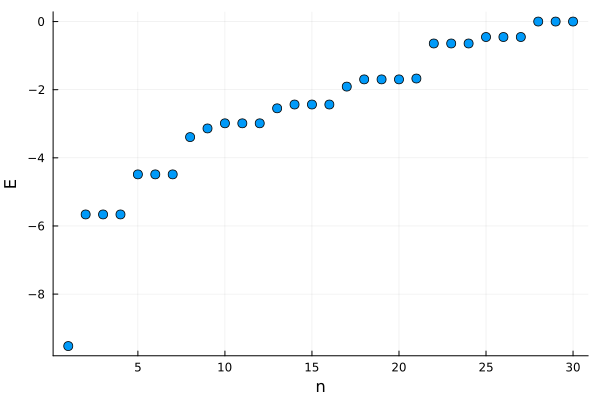

In [14]:
# Plot energies
y = eigenenergies(dense(HC_Hamiltonian_MB))[1:30]
x=1:length(y)
gr()
plot(x, y, seriestype = :scatter, markersize = 5, legend=false, xlabel="n", ylabel="E")

# Bose-Hubbard Model

\begin{equation}
H = -t \sum_{<ij>} \left( b_i^\dagger b_j + h.c. \right) + U/2 \sum_i n_i \left( n_i -1\right)
\end{equation}

In [15]:
NBasis

NLevel(N=12)

In [16]:
# All of states in N Fock Space
# Define Maximum Occupation Number (Total Particle Number) for Many-Body Basis
States = bosonstates(NBasis, [PN]) 
# Many-Body Basis
Basis_MB = ManyBodyBasis(NBasis, States)

ManyBody(onebodybasis=NLevel(N=12), states:78)

In [21]:
# On-Site Potantiel Term
U=2 # U yeterince büyük iken hard-core enerjilerine yaklaşır.
# Kinetic term
KT = SparseOperator(Basis_MB)
# Interaction term
IT = SparseOperator(Basis_MB)
for m in 1:N
    # Occupation (total particle) Operator: number()
    IT = IT + U/2 * number(Basis_MB, m) * ( number(Basis_MB, m) - identityoperator(Basis_MB) ) 
    for n in 1:N
        KT = KT + H[m,n] * transition(Basis_MB, m, n)
    end
end
MB_Hamiltonian = KT + IT
# Energies of Many-Body Hamiltonian with On-Site Interaction
eigenenergies(dense(MB_Hamiltonian))

78-element Vector{Float64}:
 -10.258269761942014
  -6.626409783326667
  -6.62640978332664
  -6.626409783326627
  -4.95828198828008
  -4.9582819882800795
  -4.958281988280078
  -3.393365733156459
  -3.2883060058370686
  -3.288306005837066
  -3.2883060058370632
  -3.216291574000857
  -3.1769662020810965
   ⋮
   4.106880074090225
   4.106880074090225
   4.106880074090225
   4.470226574554639
   4.4702265745546415
   4.47022657455465
   4.9034076831296085
   5.130821854390885
   5.13082185439089
   5.130821854390896
   5.704085962558462
   6.010856427732621

In [22]:
# Check some parameters
println("Parameters:")
println("Amplitude of Lattice Potantiel=",U)
println("Number of Particle=",PN)
println("Number of Unit-Cell=",Nx*Ny)
println("Filling Fraction=",PN/(Nx*Ny))

Parameters:
Amplitude of Lattice Potantiel=2
Number of Particle=2
Number of Unit-Cell=4
Filling Fraction=0.5


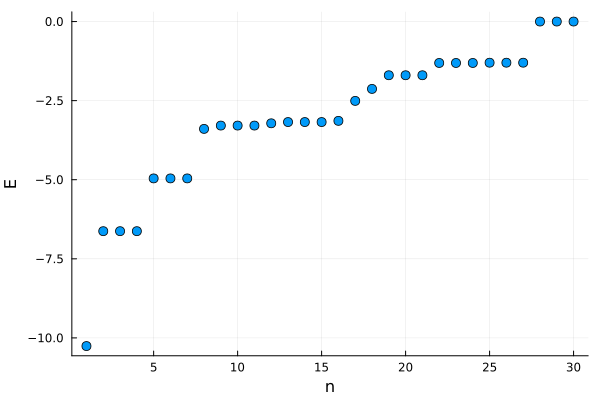

In [23]:
# Plot Energies
yy= eigenenergies(dense(MB_Hamiltonian))[1:30]
xx=1:length(yy)
gr()
plot(xx, yy, seriestype = :scatter, markersize = 5, legend=false, xlabel="n", ylabel="E")

# Hard-Core vs Bose-Hubbard

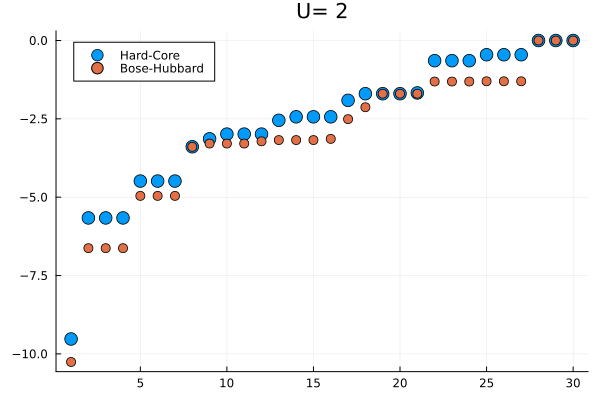

In [24]:
# U yeterince büyük iken bose-hubbard enerjileri, hard-core enerjilerine yaklaşır
plot(x, y, seriestype = :scatter, markersize = 7, label="Hard-Core")
plot!(xx, yy, seriestype = :scatter, markersize = 5, label="Bose-Hubbard", legend=:topleft, title="U= $(U)")